In [1]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv("./cicddos2019_dataset_unbalance.csv" )
low_memory=False
data.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,17,216631,6,0,2088,0,393,321,348.0,...,14,0.0,0.0,0,0,0.0,0.0,0,0,Attack
1,1,17,2,2,0,802,0,401,401,401.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
2,2,17,48,2,0,766,0,383,383,383.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
3,3,17,107319,4,0,1398,0,369,330,349.5,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
4,4,17,107271,4,0,1438,0,389,330,359.5,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Attack


In [3]:
mask = data.isnull().any(axis=1) # place of NaN and Infinty count
#drop data that with null values  
print("Before Drop null values", data.shape)
data =  data[~mask] 
#let Benign  = 0  and Bot =1 in label  
print("After Drop null values", data.shape)

Before Drop null values (431371, 67)
After Drop null values (431371, 67)


In [4]:
data =  data.drop('Unnamed: 0',axis=1)

In [5]:
data.shape

(431371, 66)

In [6]:
#Remove Duplicate
data.drop_duplicates()
data.shape

(431371, 66)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431371 entries, 0 to 431370
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int64  
 1   Flow Duration             431371 non-null  int64  
 2   Total Fwd Packets         431371 non-null  int64  
 3   Total Backward Packets    431371 non-null  int64  
 4   Fwd Packets Length Total  431371 non-null  int64  
 5   Bwd Packets Length Total  431371 non-null  int64  
 6   Fwd Packet Length Max     431371 non-null  int64  
 7   Fwd Packet Length Min     431371 non-null  int64  
 8   Fwd Packet Length Mean    431371 non-null  float64
 9   Fwd Packet Length Std     431371 non-null  float64
 10  Bwd Packet Length Max     431371 non-null  int64  
 11  Bwd Packet Length Min     431371 non-null  int64  
 12  Bwd Packet Length Mean    431371 non-null  float64
 13  Bwd Packet Length Std     431371 non-null  f

In [8]:
data['Protocol'].unique()

array([17,  6,  0], dtype=int64)

In [9]:
data.shape


(431371, 66)

In [10]:

labelencoder = LabelEncoder()
data['Protocol'] = labelencoder.fit_transform(data['Protocol'])
data['Protocol'].unique()

array([2, 1, 0], dtype=int64)

In [11]:
data.shape

(431371, 66)

In [12]:
data['Flow Duration'].unique()

array([216631,      2,     48, ..., 337766,  47709, 322010], dtype=int64)

In [13]:

labelencoder = LabelEncoder()
data['Class'] = labelencoder.fit_transform(data['Class'])
data['Class'].unique()

array([0, 1])

In [14]:
labelencoder = LabelEncoder()
data['Protocol'] = labelencoder.fit_transform(data['Protocol'])
data['Protocol'].unique()

array([2, 1, 0], dtype=int64)

In [15]:
col_for_not_nor = ['Fwd PSH Flags','SYN Flag Count', 
'RST Flag Count', 'Protocol_0', 'Protocol_1', 'Protocol_2',
'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count']

In [16]:
col_for_nor = [] 

for col in data.columns:
    if col not in col_for_not_nor:
         col_for_nor.append(col)
    else:
        continue 
col_for_nor        

['Protocol',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Fwd Packets Length Total',
 'Bwd Packets Length Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Down/Up Ratio',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Ini

In [17]:
inputs = data.drop('Class', axis='columns')

In [18]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[col_for_nor] = scaler.fit_transform(data[col_for_nor])


data.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,1.0,1.805269e-03,0.000058,0.0,0.000137,0.0,0.012235,0.150634,0.115412,0.015795,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,8.333421e-09,0.000012,0.0,0.000053,0.0,0.012484,0.188175,0.132989,0.000000,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.916708e-07,0.000012,0.0,0.000050,0.0,0.011924,0.179728,0.127019,0.000000,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,8.943260e-04,0.000035,0.0,0.000092,0.0,0.011488,0.154857,0.115909,0.010136,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,8.939260e-04,0.000035,0.0,0.000094,0.0,0.012111,0.154857,0.119226,0.015333,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
mask = data.isnull().any(axis=1) # place of NaN and Infinty count
#drop data that with null values  
print("Before Drop null values", data.shape)
data =  data[~mask] 
#let Benign  = 0  and Bot =1 in label  
print("After Drop null values", data.shape)

Before Drop null values (431371, 66)
After Drop null values (431371, 66)


In [20]:
# Predictive Machine Learning
x= inputs
y = data['Class']


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=200)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((301959, 65), (129412, 65), (301959,), (129412,))

In [23]:
print(y_train.value_counts())

0.0    233467
1.0     68492
Name: Class, dtype: int64


In [24]:
# Oversamping 

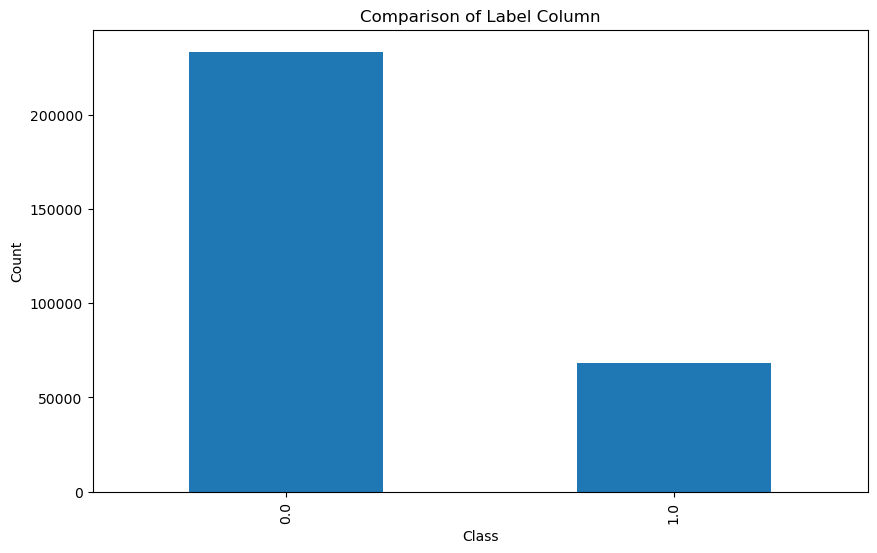

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = y_train.value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [26]:
from imblearn.under_sampling import NearMiss
from collections import Counter
nm = NearMiss()

X_train, y_train = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0.0: 68492, 1.0: 68492})


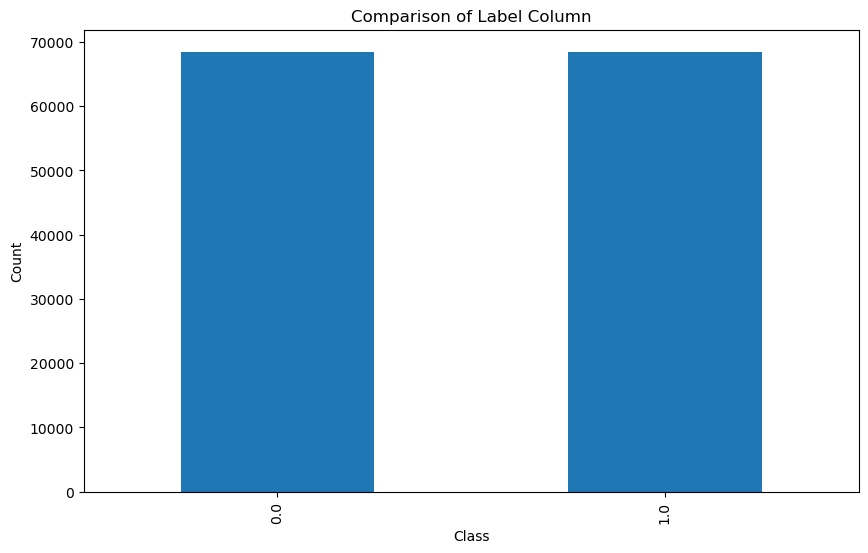

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = y_train.value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

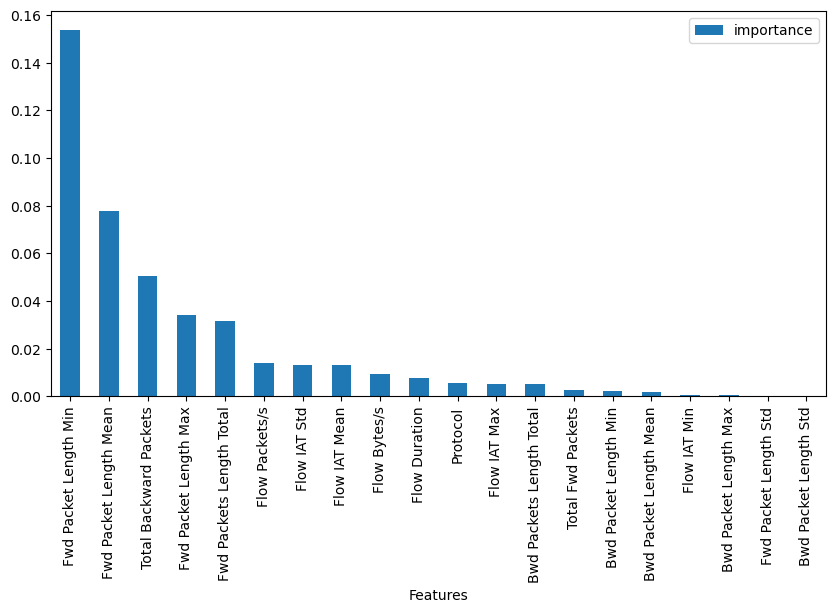

In [28]:
import numpy as np
import sklearn as sk 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=100,max_depth=15,criterion='entropy')
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
indices = np.argsort(importances)[::-1]
refclasscol=list(data.columns.values)
impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})


impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
plt.rcParams['figure.figsize'] = (10, 5)
impor_bars.plot.bar();

In [29]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(forest.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(forest, threshold=thresh, prefit=False)
 select_X_train = selection.fit_transform(X_train,y_train)
 # train model
 selection_model = RandomForestClassifier(n_estimators=50, random_state=200,max_depth=15,criterion='entropy')
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000000, n=65, Accuracy: 86.65%
Thresh=0.000000, n=65, Accuracy: 86.65%
Thresh=0.000004, n=63, Accuracy: 84.82%
Thresh=0.000033, n=62, Accuracy: 80.37%
Thresh=0.000036, n=61, Accuracy: 91.91%
Thresh=0.000068, n=60, Accuracy: 86.65%
Thresh=0.000128, n=59, Accuracy: 89.13%
Thresh=0.000129, n=58, Accuracy: 90.23%
Thresh=0.000150, n=57, Accuracy: 87.20%
Thresh=0.000173, n=56, Accuracy: 86.86%
Thresh=0.000200, n=55, Accuracy: 77.01%
Thresh=0.000219, n=54, Accuracy: 88.08%
Thresh=0.000224, n=53, Accuracy: 91.13%
Thresh=0.000242, n=52, Accuracy: 85.82%
Thresh=0.000309, n=51, Accuracy: 78.69%
Thresh=0.000327, n=50, Accuracy: 90.94%
Thresh=0.000720, n=49, Accuracy: 93.31%
Thresh=0.000767, n=48, Accuracy: 86.94%
Thresh=0.001090, n=47, Accuracy: 80.57%
Thresh=0.001579, n=46, Accuracy: 87.85%
Thresh=0.001727, n=45, Accuracy: 93.26%
Thresh=0.001744, n=44, Accuracy: 79.79%
Thresh=0.002158, n=43, Accuracy: 92.15%
Thresh=0.002233, n=42, Accuracy: 89.36%
Thresh=0.002475, n=41, Accuracy: 84.70%


In [30]:
sele = SelectFromModel(forest, threshold=0.026054, prefit=False)
X_train = sele.fit_transform(X_train,y_train)
X_test = sele.transform(X_test)

In [31]:
filter = sele.get_support(indices=True)
new_features = data.columns[filter]
print(new_features)

Index(['Total Backward Packets', 'Fwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Bwd Header Length', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'ACK Flag Count', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
       'Init Fwd Win Bytes'],
      dtype='object')


In [32]:
from sklearn import tree


DT  =tree.DecisionTreeClassifier(random_state=101,
                                 max_depth=21,
                                 criterion="gini")
DT.fit(X_train, y_train)


y_prediction_DT = DT.predict(X_test)


accuracy_score_DT = accuracy_score(y_test, y_prediction_DT)
print( "Accuracy score: " , accuracy_score_DT)

f1_score_DT = f1_score(y_test,y_prediction_DT , average='weighted')
print(f"F1 score: " ,f1_score_DT)

recall_DT = recall_score(y_test, y_prediction_DT, average='weighted')
print("Recall score : " ,recall_DT )

# Calculate and print the precision score
precision_DT = precision_score(y_test,y_prediction_DT, average='weighted')
print("Precision score:",precision_DT)

Accuracy score:  0.9938336475751862
F1 score:  0.9938608898779978
Recall score :  0.9938336475751862
Precision score: 0.9939806931691527


In [33]:
from sklearn.model_selection import GridSearchCV
clf  =tree.DecisionTreeClassifier()
clf.fit(select_X_train, y_train)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9,20,21,22,23,24,25,26,27,28,29,30,40],
              'criterion' :['gini', 'entropy']
             }
#
# Create gridsearch instance
#
grid = GridSearchCV(estimator=clf,
                    param_grid=param_grid,
                    cv=10,
                    n_jobs=1,
                    verbose=0)
#
# Fit the model
#
grid.fit(X_train, y_train)
#
# Assess the score
#
grid.best_score_, grid.best_params_


(0.9968391267218818,
 {'ccp_alpha': 0.001,
  'criterion': 'entropy',
  'max_depth': 21,
  'max_features': 'auto'})

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators= 40,
    use_label_encoder= False,
    max_depth= 21,
    booster= 'gbtree',
    importance_type= 'gain',
    objective='binary:logistic',
    eval_metric='logloss',)

xgb.fit(X_train, y_train)

y_prediction_xgb = xgb.predict(X_test)


accuracy_score_xgb = accuracy_score(y_test, y_prediction_xgb)
print( "Accuracy score: " , accuracy_score_xgb)

f1_score_xgb = f1_score(y_test,y_prediction_xgb , average='weighted')
print(f"F1 score: " ,f1_score_xgb)

recall_xgb = recall_score(y_test, y_prediction_xgb, average='weighted')
print("Recall score : " ,recall_xgb )

# Calculate and print the precision score
precision_xgb = precision_score(y_test,y_prediction_xgb, average='weighted')
print("Precision score:",precision_xgb)

C:\Users\moode\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy score:  0.9935477390041109
F1 score:  0.9935788179164439
Recall score :  0.9935477390041109
Precision score: 0.9937200899813553


In [35]:
from sklearn.linear_model import LogisticRegression

lg  = LogisticRegression( random_state=101, max_iter=100)
lg.fit(X_train, y_train)


y_prediction_lg = lg.predict(X_test)


accuracy_lg = accuracy_score(y_test, y_prediction_lg)
print("Accuracy score: " ,accuracy_lg)


f1_lg = f1_score(y_test, y_prediction_lg, average='weighted')
print("F1 score: " , f1_lg )

recall_lg = recall_score(y_test,y_prediction_lg, average='weighted')
print("Recall score:" ,recall_lg)

# Calculate and print the precision score
precision_lg = precision_score(y_test,y_prediction_lg, average='weighted')
print(f"Precision score:" , precision_lg)

C:\Users\moode\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.7689395110190709
F1 score:  0.7738662802342458
Recall score: 0.7689395110190709
Precision score: 0.7802487917591369


In [36]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier( iterations=100, depth=6,  
                                 random_state=101 ,verbose=1)
catboost.fit(X_train, y_train)


# Make predictions on the testing data
y_prediction_catboost = catboost.predict(X_test)

# Calculate and print the accuracy score
accuracy_catboost = accuracy_score(y_test, y_prediction_catboost)
print("Accuracy score:" ,accuracy_catboost)

# Calculate and print the f1 score
f1_catboost = f1_score(y_test, y_prediction_catboost , average='weighted')
print("F1 score: ",f1_catboost)
recall_catboost = recall_score(y_test,y_prediction_catboost , average='weighted')
print("Recall score:",recall_catboost)

# Calculate and print the precision score
precision_catboost = precision_score(y_test,y_prediction_catboost, average='weighted')
print("Precision score: ",precision_catboost)

Learning rate set to 0.5
0:	learn: 0.3182301	total: 187ms	remaining: 18.5s
1:	learn: 0.1788687	total: 208ms	remaining: 10.2s
2:	learn: 0.1071769	total: 227ms	remaining: 7.35s
3:	learn: 0.0682940	total: 246ms	remaining: 5.91s
4:	learn: 0.0459197	total: 266ms	remaining: 5.05s
5:	learn: 0.0318123	total: 285ms	remaining: 4.47s
6:	learn: 0.0241600	total: 304ms	remaining: 4.04s
7:	learn: 0.0178675	total: 322ms	remaining: 3.71s
8:	learn: 0.0146874	total: 343ms	remaining: 3.47s
9:	learn: 0.0119905	total: 361ms	remaining: 3.25s
10:	learn: 0.0099325	total: 386ms	remaining: 3.12s
11:	learn: 0.0094060	total: 408ms	remaining: 2.99s
12:	learn: 0.0088343	total: 425ms	remaining: 2.84s
13:	learn: 0.0086999	total: 442ms	remaining: 2.71s
14:	learn: 0.0085158	total: 458ms	remaining: 2.6s
15:	learn: 0.0084311	total: 475ms	remaining: 2.49s
16:	learn: 0.0080948	total: 493ms	remaining: 2.41s
17:	learn: 0.0080161	total: 511ms	remaining: 2.33s
18:	learn: 0.0079861	total: 528ms	remaining: 2.25s
19:	learn: 0.0079

In [37]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_prediction_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test,y_prediction_gnb)
print("Accuracy score: ",accuracy_gnb)

f1_gnb = f1_score(y_test,y_prediction_gnb , average='weighted')
print("F1 score:",f1_gnb)
recall_gnb = recall_score(y_test, y_prediction_gnb, average='weighted')
print("Recall score: " ,recall_gnb)

precision_gnb = precision_score(y_test, y_prediction_gnb, average='weighted')
print("Precision score: ",precision_gnb)

Accuracy score:  0.6217352332086669
F1 score: 0.6138291990729172
Recall score:  0.6217352332086669
Precision score:  0.6063893528867589


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=1.0,
    max_depth=3, random_state=42).fit(X_train, y_train)

y_predec_gbc =gbc.predict(X_test)


accuracy_gbc  = accuracy_score(y_test, y_predec_gbc)
print(f"Accuracy score: ",accuracy_gbc)


f1_gbc = f1_score(y_test, y_predec_gbc, average='weighted')
print("F1 score: ",f1_gbc)
recall_gbc = recall_score(y_test, y_predec_gbc, average='weighted')
print("Recall score: ",recall_gbc)


precision_gbc = precision_score(y_test, y_predec_gbc, average='weighted')
print(f"Precision score: {precision_gbc}")

Accuracy score:  0.9069019874509319
F1 score:  0.9113279614361518
Recall score:  0.9069019874509319
Precision score: 0.9285692363059255


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
knn.fit(X_train, y_train)


y_predec_knn = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy_knn = accuracy_score(y_test, y_predec_knn )
print("Accuracy score:" ,accuracy_knn )

# Calculate and print the f1 score
knn_f1_score = f1_score(y_test,y_predec_knn , average='weighted')
print("F1 score: ",knn_f1_score)
knn_recall = recall_score(y_test,y_predec_knn , average='weighted')
print("Recall score:" ,knn_recall)

# Calculate and print the precision score
knn_precision = precision_score(y_test,y_predec_knn , average='weighted')
print("Precision score",knn_precision)

C:\Users\moode\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score: 0.7882112941612833
F1 score:  0.8049502441436598
Recall score: 0.7882112941612833
Precision score 0.8843143589460934


In [40]:
"""
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=21, random_state=42)
ETC.fit(X_train, y_train)

y_predec_ETC = knn.predict(X_test)

ETC_accuracy = accuracy_score(y_test, y_predec_ETC )
print("Accuracy score:" ,ETC_accuracy  )


ETC_f1_score = f1_score(y_test,y_predec_ETC , average='weighted')
print("F1 score: ",ETC_f1_score)
ETC_recall = recall_score(y_test,y_predec_ETC , average='weighted')
print("Recall score:" ,ETC_recall)

# Calculate and print the precision score
ETC_precision = precision_score(y_test,y_predec_ETC , average='weighted')
print("Precision score",ETC_precision)
"""

'\nfrom sklearn.ensemble import ExtraTreesClassifier\n\nETC = ExtraTreesClassifier(n_estimators=21, random_state=42)\nETC.fit(X_train, y_train)\n\ny_predec_ETC = knn.predict(X_test)\n\nETC_accuracy = accuracy_score(y_test, y_predec_ETC )\nprint("Accuracy score:" ,ETC_accuracy  )\n\n\nETC_f1_score = f1_score(y_test,y_predec_ETC , average=\'weighted\')\nprint("F1 score: ",ETC_f1_score)\nETC_recall = recall_score(y_test,y_predec_ETC , average=\'weighted\')\nprint("Recall score:" ,ETC_recall)\n\n# Calculate and print the precision score\nETC_precision = precision_score(y_test,y_predec_ETC , average=\'weighted\')\nprint("Precision score",ETC_precision)\n'

In [41]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=21, random_state=42)
adaboost.fit(X_train,y_train), 


y_predec_adaboost = adaboost.predict(X_test)


adaboost_accuracy = accuracy_score(y_test, y_predec_adaboost)
print("Accuracy score: ",adaboost_accuracy)


adaboost_f1_score = f1_score(y_test, y_predec_adaboost, average='weighted')
print("F1 score:",adaboost_f1_score)

adaboost_recall = recall_score(y_test, y_predec_adaboost, average='weighted')
print("Recall score:",adaboost_recall)

# Calculate and print the precision score
adaboost_precision= precision_score(y_test, y_predec_adaboost, average='weighted')
print("Precision score:",adaboost_precision)

Accuracy score:  0.9955568262603159
F1 score: 0.9955627591955082
Recall score: 0.9955568262603159
Precision score: 0.995577046750795


In [42]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)

y_predec_svc =svc.predict(X_test)


svc_accuracy = accuracy_score(y_test, y_predec_svc)
print("Accuracy score: ",svc_accuracy)


svc_f1_score = f1_score(y_test, y_predec_svc, average='weighted')
print("F1 score:",adaboost_f1_score)

svc_recall = recall_score(y_test, y_predec_svc, average='weighted')
print("Recall score:",svc_recall)

# Calculate and print the precision score
svc_precision= precision_score(y_test, y_predec_svc, average='weighted')
print("Precision score:",svc_precision)

Accuracy score:  0.7737381386579297
F1 score: 0.9955627591955082
Recall score: 0.7737381386579297
Precision score: 0.8249555232147054


In [43]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=10, random_state=42)
ETC.fit(X_train, y_train)

y_predec_ETC = knn.predict(X_test)

ETC_accuracy = accuracy_score(y_test, y_predec_ETC )
print("Accuracy score:" ,ETC_accuracy  )


ETC_f1_score = f1_score(y_test,y_predec_ETC , average='weighted')
print("F1 score: ",ETC_f1_score)
ETC_recall = recall_score(y_test,y_predec_ETC , average='weighted')
print("Recall score:" ,ETC_recall)

# Calculate and print the precision score
ETC_precision = precision_score(y_test,y_predec_ETC , average='weighted')
print("Precision score",ETC_precision)

C:\Users\moode\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score: 0.7882112941612833
F1 score:  0.8049502441436598
Recall score: 0.7882112941612833
Precision score 0.8843143589460934
